<a href="https://colab.research.google.com/github/tokyo8182/LLM-RAG/blob/main/TanishaBanik_AgentDevelopmentUsingLangchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pypdfium2

In [2]:
!pip install pytesseract
!pip install easyocr

In [3]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import pandas as pd
from pytesseract import image_to_string
from easyocr import Reader
language_reader = Reader(["en"])

In [4]:
pd.set_option('max_colwidth', 800)

In [5]:
df = pd.read_csv("new_LK_tea_dataset_updated.csv")
df[(df["quality"]=="good") & (df["required_ocr"]=="no") & (df["has_tables"]=="yes")].head(20) #MF BL 146 (2).pdf

,id,class,filename,path,url,language_label,required_ocr,has_tables,text_path,quality,data_origin,date_of_issuance,issuing_authority,topic,text_content
35,35,Circulers,07_General-Instruction-for-the-Submission-of-Tea-Samples-for-Testing_compressed.pdf,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Circulers/07_General-Instruction-for-the-Submission-of-Tea-Samples-for-Testing_compressed.pdf,NaN,en,no,yes,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Circulers/07_General-Instruction-for-the-Submission-of-Tea-Samples-for-Testing_compressed.txt,good,scraped,NaN,Tea Board Analytical Lab,07_General-Instruction-for-the-Submission-of-Tea-Samples-for-Testing_compressed,"\n \n \nANALYTICAL LABORATORY OF SRILANKA TEA BOARD \nGENERAL INSTRUCTION FOR THE SUBMISSION OF TEA SAMPL ES \n FOR TESTING \n \n1. Submission of tea sample \n/square4 Sample of tea should be submitted to the Analytical Laboratory on any working day (Monday-Friday) \nbetween 8.30 a. m. to 4.15 p.m. (For internal clien ts) /3.30p.m. (For external clients). \n/square4 Sample of tea should be submitted to the Analytical Laboratory along with a written request \n(preferably on an official memo / Company letterhea d) addressed to the Director (Analytical Services). \n/square4 For external clients, it is required to make payme nt as per the Sri Lanka Tea Board circular namely \n“Levy of Fees & Chargers for Board’s Service” (Ref: OR/1/87) dated 01 st September 2011 together \nwith th..."
108,110,Regulation,2358-03_E.pdf,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Regulation/2358-03_E.pdf,NaN,en,no,yes,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Regulation/2358-03_E.txt,good,scraped,NaN,Government of Sri Lanka,Extra Ordinary Gazette,"Page 1 of 3 \r\n TEA RESEARCH INSTITUTE OF SRI LANKA \r\n \r\nIssued in: December 2018 Guideline No: 0 2/2018 \r\n \r\nGUIDELINES ON THE USE OF CO -3 GRASS (HYBRID NAPIER) FOR SOIL \r\nREHABILITATION BEFORE REPLANTING OF TEA \r\nIN THE LOW COUNTRY \r\n \r\nIntroduction \r\nSoil rehabilitation for a period o f 18-24 months before replanting of old tea , is a must \r\nto improve soil conditions , minimize weed, pest and disease infestations and reduce \r\nsoil toxicity . Most of the farmers are reluctant to grow rehabilitation grass es for such \r\na long period before tea cu ltivation since there is no income generat ed during this \r\nperiod. Furthermore, there is a scarcity of planting materials of recommended \r\nrehabilitation grass species such as Mana and Guatemala, p..."
111,113,Regulation,2158-03_E.pdf,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Regulation/2158-03_E.pdf,NaN,en,no,yes,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Regulation/2158-03_E.txt,good,scraped,NaN,Government of Sri Lanka,Extra Ordinary Gazette,"I fldgi ( ^ I& fPoh - YS% ,xld m%cd;dka;s%l iudcjd§ ckrcfha w;s úfYI .eiÜ m;%h - 2020'01'13\nPART I : S EC. (I) - GAZETTE EXTRAORDINARY OF THE DEMOCRATIC SOCIALIST REPUBLIC OF SRI LANKA 13.01.20201A\nw;s úfYI\nwxl 2158$3 - 2020 ckjdß ui 13 jeks i`ÿod - 2020'01'13\nNo. 2158/3 - MONDAY, JANUARY 13, 2020EXTRAORDINARYThe Gazette of the Democratic Socialist Republic of Sri Lanka\n(Published by Authority)\nPART I : SECTION (I) — GENERAL\nGovernment NotificationsY%S ,xld m%cd;dka;%sl iudcjd§ ckrcfha .eiÜ m;%h\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ..."
114,116,Regulation,2248-36_E.pdf,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Regulation/2248-36_E.pdf,NaN,en,no,yes,/content/drive/MyDrive/Omdena_Challenge/new_LK_tea_dataset/Regulation/2248-36_E.txt,good,scraped,NaN,Government of Sri Lanka,Extra Ordinary Gazette,"w;s úfYI\nwxl 2248$36 - 2021 Tlaf;dan¾ ui 06 jeks nodod - 2021'10'06\nNo. 2248/36 - wedNesday , october 06 , 2021EXTRAORDINARYY%S ,xld m%cd;dka;%sl iudcjd§ ckrcfha .eiÜ m;%h\nThe Gazette of the Democratic Socialist Republic of Sri Lanka\n(Published by Authority)\nPART I : SECTION (I) — GENERAL\nGovernment Notificati

In [6]:
def convert_pdf_to_images(file_path, scale=300/72):

    pdf_file = pdfium.PdfDocument(file_path)
    page_indices = [i for i in range(len(pdf_file))]

    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    return list_final_images

In [7]:
def display_images(list_dict_final_images):

    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [8]:
convert_pdf_to_images = convert_pdf_to_images('MF BL 146 (2).pdf')

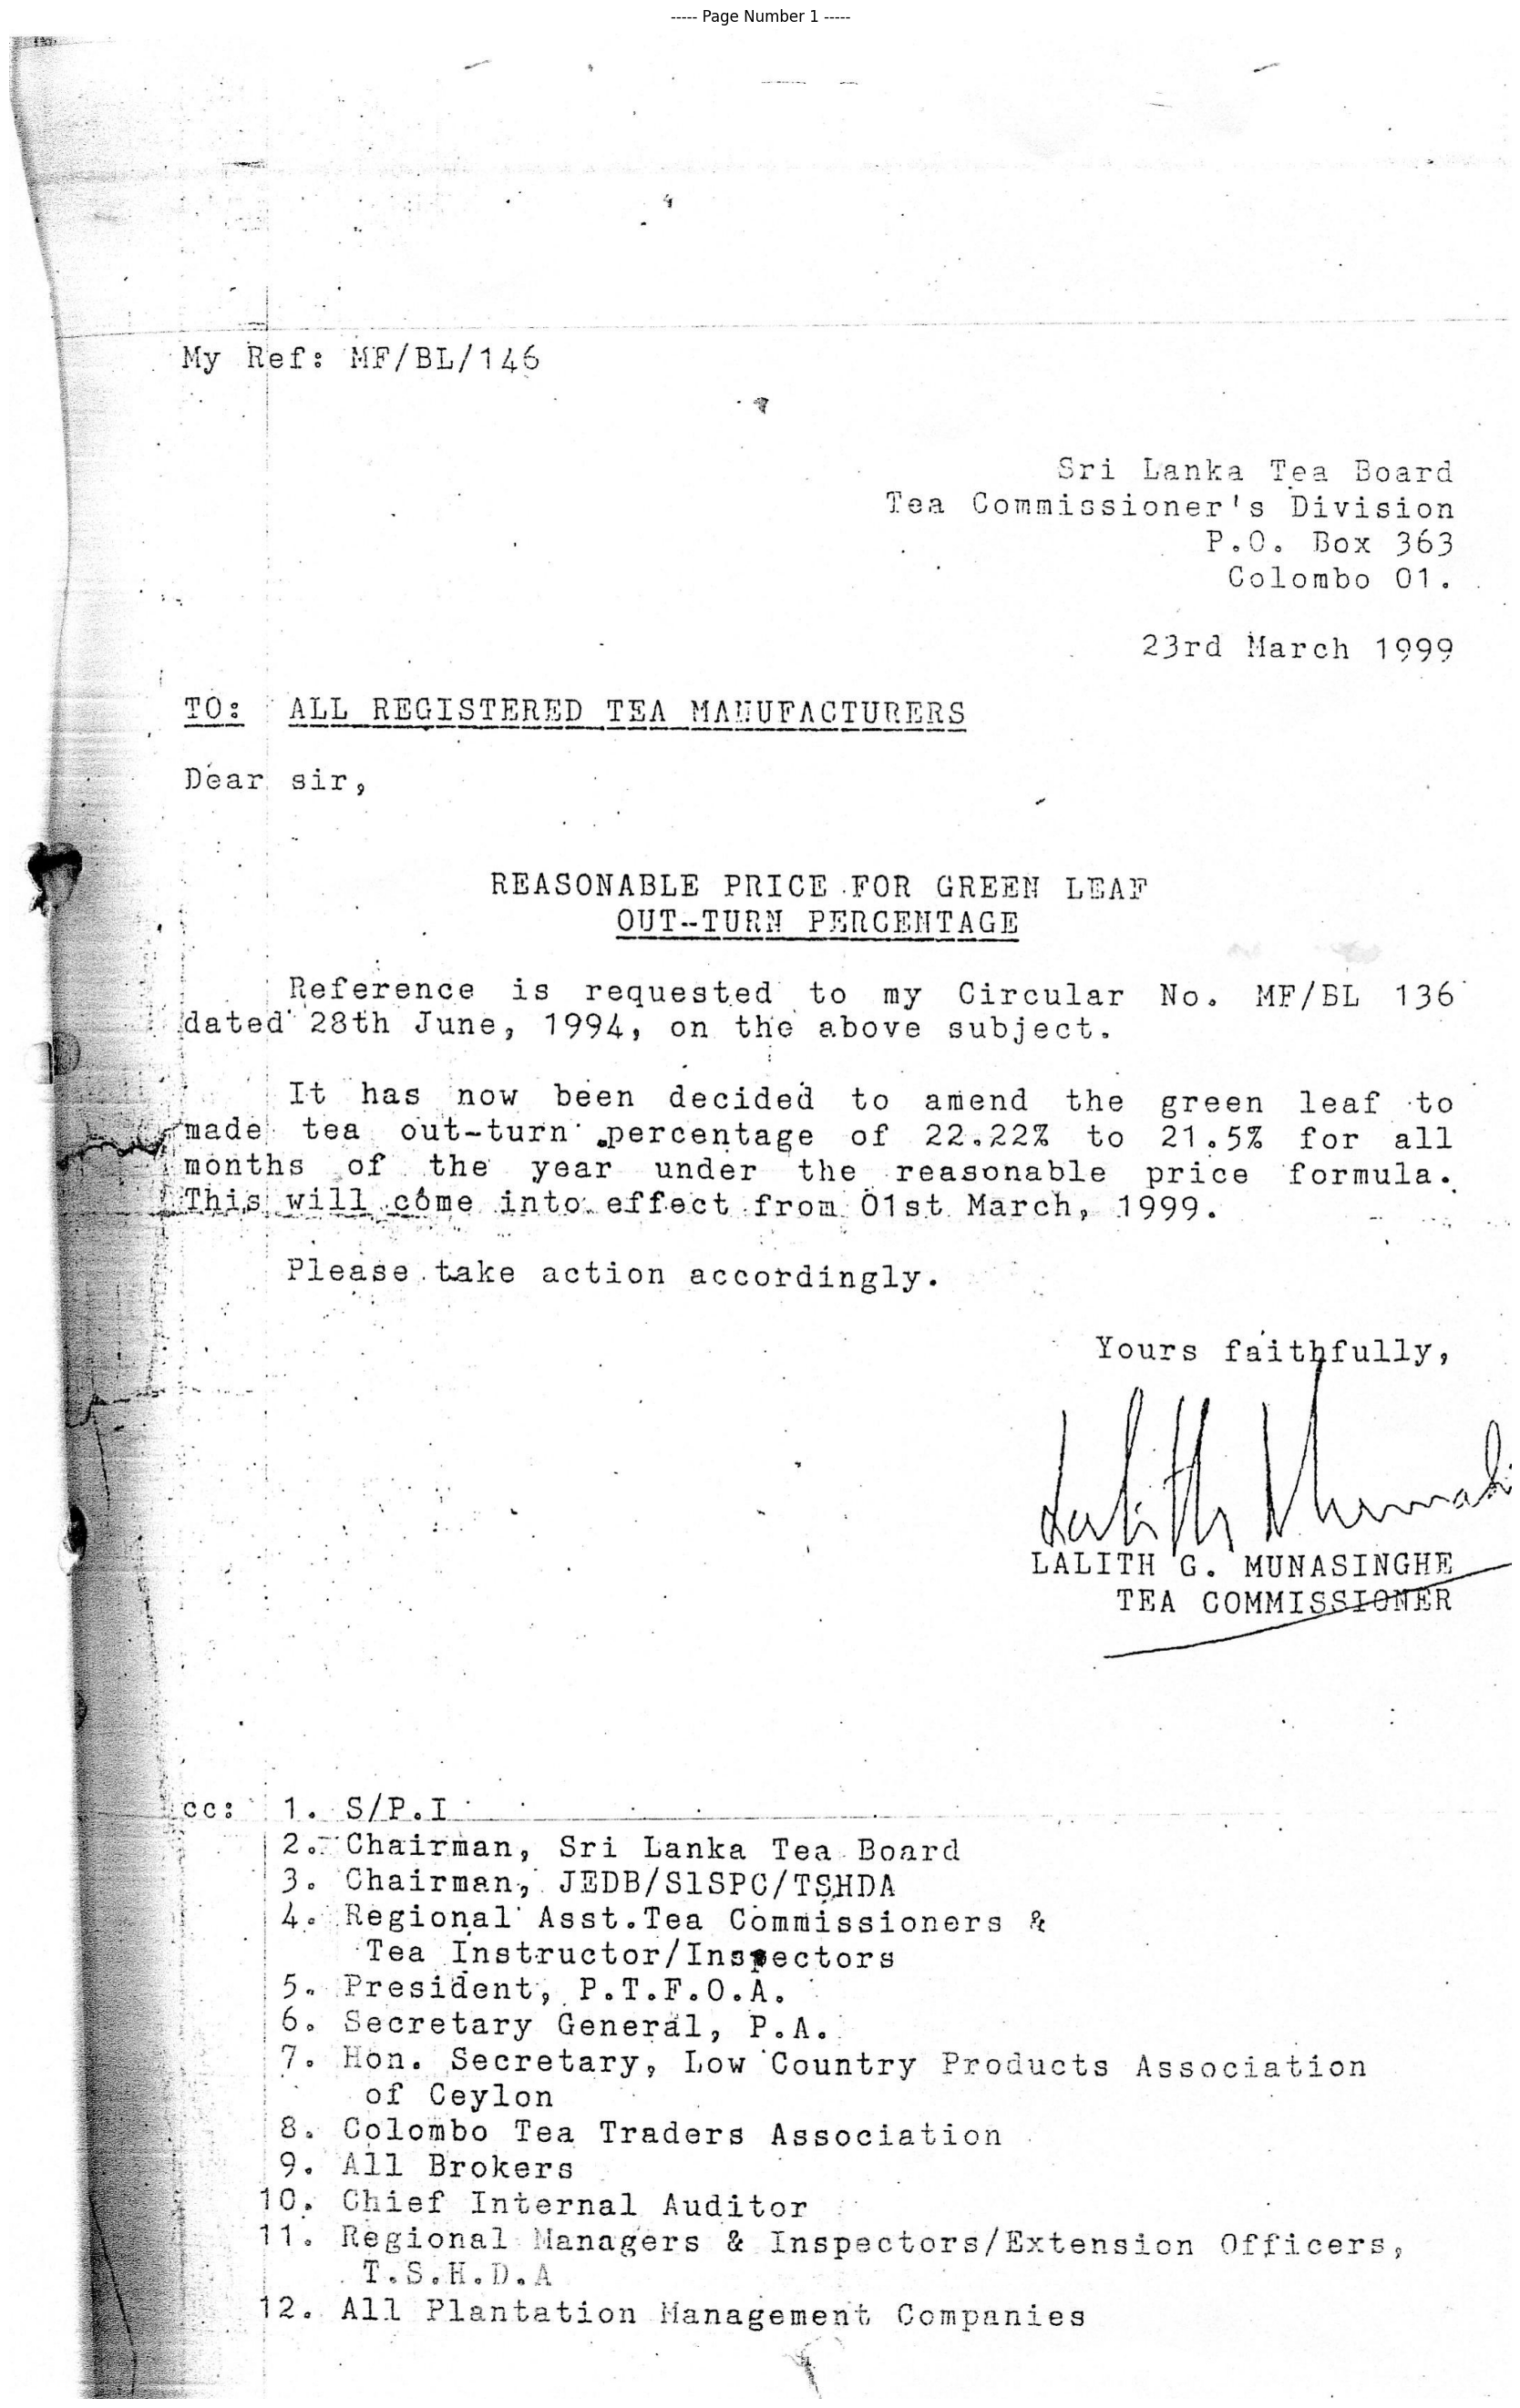

In [9]:
display_images(convert_pdf_to_images)

In [10]:
def extract_text_with_pytesseract(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(image))
        image_content.append(raw_text)

    return "\n".join(image_content)

In [15]:
pip install pytesseract

In [12]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (10.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [13]:
text_with_pytesseract = extract_text_with_pytesseract(convert_pdf_to_images)

print(text_with_pytesseract)

“My Ref: MF/BL/146
ee | ,

 

s
2-9. Box 363
olombo QO1.

23rd March 1999

(~T02 “ALL REGISTERED TEA MANUPACTURERS

BES REGISTERED THA MAUUPACTURER =

   
  
  
  

Dear. sir,
REASONABLE PRICE .FOR GREEN LGAF
OUT-TURN PERGEHTAGE

‘¢ } | Reference is requested to my Circular No. MF/BL 136
- dated’ 28th June, 1994, on the above subject.

a It has now been decided to amend the green leaf -to.
ade. tea out-turn’ percentage of 22.22% to 21.5% for all

onths .of _the year under the reasonable price formula.
his, will .come into.effect from 01st March, 1999. - 7

“Please.take action accordingly.

Yours faithfully,

ee alee

LALITH G. MUNASINGHE
TEA COMMISS

    
 

we Tae a a ice a
‘Chairman, Sri Lanka — Board
> Chairman, JEDB/S1SPC/TSHDA
“ Regional’ Asst. Tea Commissioners %
‘Tea Instructor/Insgectors
President, P.T.F.0O.A. |
Secretary Generdl, P.A.
Eon. Secretary, Low: Country Products Association
of Ceylon
Colombo Tea Traders Association
All Brokers
Chief Internal Auditor
Regional: Manager

In [14]:
def extract_text_with_easyocr(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])

        image_content.append(raw_text)

    return "\n".join(image_content)

In [15]:
text_with_easy_ocr = extract_text_with_easyocr(convert_pdf_to_images)
print(text_with_easy_ocr)

My
Re f :
MF / BL/146
Sri
Lanka
Tea
Board
Tea
Commissioner ' s
Division
P , 0 .
Tox
363
Colombo
01
23rd
Harch
1999
TQi
ALL
REGISTERED
TEA_MAWWTAGTULEE S
Dear
sir
9
REASONABLE
PRICE
FOR
GREEN
LEA?
QUI-TURN
PEL GEHTAGE
Reference
18
request,ed
to
my
Circular
No .
MF / BL
136
'da ted
28th
June ,
1994 ,
on
the
& bov e
8ubj ect .
It
has
now
been
decided
to
a mend
the
green
leaf
to
m2d8
te&
out-turn
-ercentage
o f
22 .223
to
21 . 5%
for
a11
months
of
the'
year
under
the
reagona ble
price
formula
Jhis
will
come
into_ effect
from: 01g+
March
1999
Plea8 8
take
action
accordingly .
Yours
faithfully,
LALith
G
MUNASINGHE
TEA
C OMMISSTANER
CC ;
1
S[P.I
2
Chairman ,
Sri
Lanka
Tea
Board
3
Chairmen,
JEDB / S1SPC / TSHDA
4
Regional
As st . Tea
Commi88ioner 9
%
Tea. Ingtructor/Ingpectors
5 _
President ,
P. T. F. 0 . A
6
Secretary General ,
P . A _
7
Hon.
Secretary ,
Low
Country
Products
Associetion
of Ceylon
8
Colombo
Tea
Traders
Association
9
A11
Brokers
10
Ghief
Internal
Auditor
11
Regional: Menagers
&

In [ ]:
!pip install PyPDF2

In [ ]:
from PyPDF2 import PdfReader
def extract_text_with_pyPDF(PDF_File):

    pdf_reader = PdfReader(PDF_File)

    raw_text = ''

    for i, page in enumerate(pdf_reader.pages):

        text = page.extract_text()
        if text:
            raw_text += text

    return raw_text

In [ ]:
text_with_pyPDF = extract_text_with_pyPDF('MF BL 146 (2).pdf')
print(text_with_pyPDF)

In [ ]:
print(text_with_pyPDF)

In [ ]:
!pip install pdf2image

In [ ]:
from pdf2image import convert_from_path
import pytesseract
import cv2
import numpy as np
import re

In [ ]:
pdf_path = 'MF BL 146 (2).pdf'
pages = convert_from_path(pdf_path, dpi=300)

In [ ]:
for page_number, page in enumerate(pages, start=1):
    # Convert PIL image to numpy array (OpenCV format)
    image = np.array(page)

    # Convert RGB to BGR (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Pre-processing the image
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a sharpening filter
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Run Tesseract OCR on the processed image
    custom_config = r'--oem 3 --psm 6'  # OEM 3: Default, PSM 6: Assume a block of text
    text = pytesseract.image_to_string(thresh, config=custom_config)

    # Print or save the extracted text
    print(f"--- Page {page_number} ---")
    print(text)
    print("\n")

--- Page 1 ---
aan ;
-. My Refs MF/BL/146
- -
- LG : 2 ,
eS : oe Sri Lanka Tea Board
e ; Tea Commissioner's Division
: ; P.O. Box 363
po, _ , Colombo 01.
pee 23rd March 1999
| 0: “ALL REGISTERED TEA MANUFACTURERS
oe .
2 Year sir, .
ae a
_ REASONABLE PRICE FOR GREEN LEAT
: oo Se OUT-TURN PERCENTAGE
| ee SaaS
7 > > | Reference is requested to my Gircular No. MF/BL 136
4. i dated’ 28th June, 1994, on the above subject.
| oe _ .
“ee. It has now been decided to anend the green leaf -to
7 gemade: tea. out-turn eercentage of 22:;22% to 21.5% for all
# months of the. year under the reasonable price formula.
| 2This).will .cbme. into effect .from.O1st. March, 1999. - oe,
SS. 'Please.take action accordingly. ~~
[a Lo. “ Yours faithfully, .
ae ; . i)
Be ee - Td Be
> ee ; LALITH G. MUNASINGHE
| ee TEA COMMISSIONER
- . .
| ee ;
—
© feet 1. S/P.T oe .
> = | | 2.0 Chairman, Sri Lanka Tea. Board
: 3. Chairman, JEDB/S1SPC/TSHDA
oe 14. Regional’ Asst.Tea Commissioners % . ,
- fae ‘Tea Instructor/Insgect

In [ ]:
for page_number, page in enumerate(pages, start=1):
    image = np.array(page)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)
    _, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    custom_config = r'--oem 3 --psm 3'
    text = pytesseract.image_to_string(thresh, config=custom_config)
    text = re.sub(r'[^a-zA-Z0-9\n\.,:;\-\(\)\s]', '', text)
    print(f"--- Page {page_number} ---")
    print(text)
    print("\n")

--- Page 1 ---
a

Sri Lanka Tea Board

Tea Commissioners Division
P.O. Box 363

Colombo 01.

23rd March 1999

TO: ALL REGISTERED TEA MANUFACTURERS

Dear sir,

REASONABLE PRICE FOR GREEN LBA
OUT-TURN PERCENTAGE

 Reference is requested to my Circular No. MFBL 136
dated 28th June , 1994, on the above subject.

ee has now been decided to amend the green leaf -to
made. tea. outturn percentage of 22.22 to 21.5 for all
months .of the year under the reasonable price formula.
This, wild, ome, Anto. effect.. frou. O1st March,. 1999. - .

lease. take action accordingly.

Yours fait fully,

ao vod  : ys

LALITH G. MUNASINGHE
TEA COMMISS

Toe SR. 2 ae : . pee
20. Chairman, Sri Lanka Tea. Board

3- Chairman,. JEDBS1SPCT SHDA

4e Regional Asst.Tea Commissioners 

Tea: InstructorInsgectors

5. President, P.T.F.0.A.

6. Secretary Generdl, P.A.

7. Hon. Secretary, Low Country Products Association
 of Ceylon

8. Golombo Tea Traders Association

ote Brokers

10. Ghief Internal Auditor

11. Regional. Mana

In [ ]:
# MF BL 66 1985 10 02.pdf
pdf_path = 'MF BL 66 1985 10 02.pdf'
pages = convert_from_path(pdf_path, dpi=300)
for page_number, page in enumerate(pages, start=1):
    # Convert PIL image to numpy array (OpenCV format)
    image = np.array(page)

    # Convert RGB to BGR (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Pre-processing the image
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a sharpening filter
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Run Tesseract OCR on the processed image
    custom_config = r'--oem 3 --psm 6'  # OEM 3: Default, PSM 6: Assume a block of text
    text = pytesseract.image_to_string(thresh, config=custom_config)

    # Print or save the extracted text
    print(f"--- Page {page_number} ---")
    print(text)
    print("\n")

--- Page 1 ---
| “Sed Lanka Ten Bonvd |
~  " Ten Cammissioner's Divisim ..
. P.O. Box 365, Colombo 1. 0°”
Ciycular letter No.MF/BL,66 | C204 October, 1985. oe
TO: ALL REGISTERED TEA MANUPACTURESS,
Dear Sir, ' - | ' .
oe | . Fayment af p Reasonable Prite for Green bhenf :
Purchased by Ten Factories, |
Reference la requeatel to paragraph 3 of my eirewlar lettar - |
No.MFYBL.64 of 17th June, 1985, regarding the formuln for calculation of
the reasonable price payable for preen leaf. . .
2, The Sri Lanka Ten Board hag now decided to revise the present
outturn percentage of 22.22 (i.e. 4.5 kga. of green leaf to 1 ke. of
Mais tan) to 24.5 - percent {i.ca. 4.65 kes. grem leaf tof ke» of mate ten]
for cpleulation of the raasenable prica payable for green lant purchased oy ~ )
tea factories during the months of April, May, June, September, October,
November and December of each year, The present outturn percentage of | an
22.22 should, however, be used in respect of the balance 5. months of the


In [ ]:
!pip install -U langchain-community langchain pypdf openai tiktoken faiss-cpu

  Using cached pypdf-5.1.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached faiss_cpu-1.9.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (4.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.6
    Uninstalling langchain-0.3.6:
      Successfully uninstalled langchain-0.3.6
  Attempting uninstall: langchain-community
    Found existing installation: langchain-community 0.3.4
    Uninstalling langchain-community-0.3.4:
      Successfully uninstalled langchain-community-0.3.4


In [ ]:
!pip install layoutparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 10.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=2ec4dcce5413da3c88dec59b8e2f22f3b59f7455fd233e8730d01b70acb85e9b
  Stored in directory: /Users/tbanik/Library/Caches/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built iopath


In [ ]:
import os
import pandas as pd
from langchain import OpenAI, VectorDBQA
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.schema import Document
import layoutparser as lp
import pdfplumber
import datetime
import cv2
import pytesseract
import numpy as np
from pdf2image import convert_from_path
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random

In [ ]:
os.environ['OPENAI_API_KEY'] = ''

In [ ]:
doc_folder_paths = ["SriLankaDocuments"]
all_documents = []

In [ ]:
def extract_text(pdf_path):
    pages = convert_from_path(pdf_path, dpi=300)
    for page_number, page in enumerate(pages, start=1):
        image = np.array(page)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
        sharpened = cv2.filter2D(gray, -1, kernel)
        _, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(thresh, config=custom_config)
        all_documents.append(Document(page_content=text, metadata={"source": pdf_path, "page_number": page_number, "date": str(datetime.datetime.now())}))

In [ ]:
for folder_path in doc_folder_paths:
    for file_path in os.listdir(folder_path):
        if file_path.endswith(".pdf"):
            print(folder_path + '/' + file_path)
            extract_text(folder_path + '/' + file_path)
        elif file_path.endswith(".txt"):
            with open(f"{folder_path}/{file_path}", "r") as txt_file:
                text = txt_file.read()
                all_documents.append(Document(page_content=text, metadata={"source": file_path, "date": str(datetime.datetime.now())}))

SriLankaDocuments/MF BL 146 (2).pdf
SriLankaDocuments/MF BL 66 1985 10 02.pdf


In [ ]:
knowledge_graph = defaultdict(list)

for doc in all_documents:
    source = doc.metadata.get("source")
    if source:
        knowledge_graph[source].append(doc.page_content)

In [ ]:
knowledge_graph

defaultdict(list,
            {'SriLankaDocuments/MF BL 146 (2).pdf': ["aan ;\n-. My Refs MF/BL/146\n- -\n- LG : 2 ,\neS : oe Sri Lanka Tea Board\ne ; Tea Commissioner's Division\n: ; P.O. Box 363\npo, _ , Colombo 01.\npee 23rd March 1999\n| 0: “ALL REGISTERED TEA MANUFACTURERS\noe .\n2 Year sir, .\nae a\n_ REASONABLE PRICE FOR GREEN LEAT\n: oo Se OUT-TURN PERCENTAGE\n| ee SaaS\n7 > > | Reference is requested to my Gircular No. MF/BL 136\n4. i dated’ 28th June, 1994, on the above subject.\n| oe _ .\n“ee. It has now been decided to anend the green leaf -to\n7 gemade: tea. out-turn eercentage of 22:;22% to 21.5% for all\n# months of the. year under the reasonable price formula.\n| 2This).will .cbme. into effect .from.O1st. March, 1999. - oe,\nSS. 'Please.take action accordingly. ~~\n[a Lo. “ Yours faithfully, .\nae ; . i)\nBe ee - Td Be\n> ee ; LALITH G. MUNASINGHE\n| ee TEA COMMISSIONER\n- . .\n| ee ;\n—\n© feet 1. S/P.T oe .\n> = | | 2.0 Chairman, Sri Lanka Tea. Board\n: 3. Chairman, J

In [ ]:
!pip install langchain-experimental

In [ ]:
from langchain_community.graphs import Neo4jGraph
from neo4j import GraphDatabase
from langchain_openai import ChatOpenAI
from langchain_experimental.graph_transformers import LLMGraphTransformer

In [ ]:
# neo4j_uri = "bolt://localhost:7474"
# neo4j_user = "neo4j"
# neo4j_password = "neo4j123"
os.environ['NEO4J_URI'] = 'neo4j://localhost:7687'
os.environ['NEO4J_USERNAME'] = 'neo4j'
os.environ['NEO4J_PASSWORD'] = 'password'
graph = Neo4jGraph()

llm = ChatOpenAI(temperature=0, model_name="gpt-4-turbo")
llm_transformer = LLMGraphTransformer(llm=llm)

# Convert documents to graph structure
graph_documents = llm_transformer.convert_to_graph_documents(all_documents)
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Nodes:[Node(id='Lalith G. Munasinghe', type='Person', properties={}), Node(id='Sri Lanka Tea Board', type='Organization', properties={}), Node(id='Jedb/S1Spc/Tshda', type='Organization', properties={}), Node(id='P.T.F.O.A.', type='Organization', properties={}), Node(id='P.A.', type='Organization', properties={}), Node(id='Low Country Products Association Of Ceylon', type='Organization', properties={}), Node(id='Colombo Tea Traders Association', type='Organization', properties={}), Node(id='All Brokers', type='Organization', properties={}), Node(id='Chief Internal Auditor', type='Person', properties={}), Node(id='All Plantation Management Companies', type='Organization', properties={})]
Relationships:[Relationship(source=Node(id='Lalith G. Munasinghe', type='Person', properties={}), target=Node(id='Sri Lanka Tea Board', type='Organization', properties={}), type='TEA_COMMISSIONER', properties={}), Relationship(source=Node(id='Lalith G. Munasinghe', type='Person', properties={}), target=N

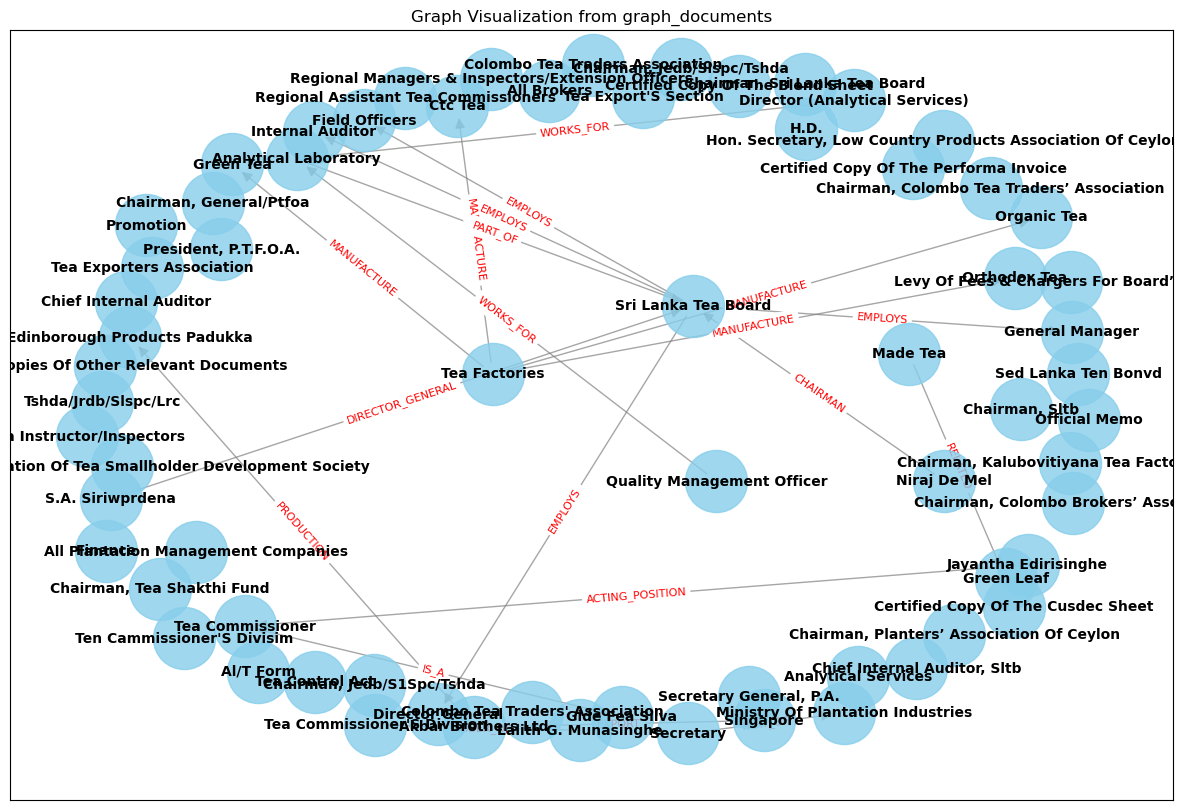

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for graph_doc in graph_documents:
    for node in graph_doc.nodes:
        G.add_node(node.id, label=node.type)
    for rel in graph_doc.relationships:
        G.add_edge(rel.source.id, rel.target.id, label=rel.type)
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=1.2)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=8)

plt.title("Graph Visualization from graph_documents")
plt.show()

In [ ]:
# Add nodes and relationships to Neo4j graph
for graph_doc in graph_documents:
    # Create nodes
    for node in graph_doc.nodes:
        # Extract the properties of the node
        node_id = node.id
        node_type = node.type
        node_properties = node.properties

        # Handle missing attributes gracefully and extract properties properly
        node_name = node_properties.get('name', node_id)  # Use 'name' if it exists in properties, otherwise fallback to node id

        query = f"""
        MERGE (n:Entity {{id: '{node_id}', name: '{node_name}', type: '{node_type}'}})
        """
        try:
            graph.query(query)
            logging.info(f"Node {node_id} inserted successfully.")
        except Exception as e:
            logging.error(f"Error inserting node {node_id}: {e}")

    # Create relationships
    for rel in graph_doc.relationships:
        query = f"""
        MATCH (a:Entity {{id: '{rel.source.id}'}})
        MATCH (b:Entity {{id: '{rel.target.id}'}})
        MERGE (a)-[r:{rel.type}]->(b)
        """
        try:
            graph.query(query)
            logging.info(f"Relationship {rel.type} inserted successfully between {rel.source.id} and {rel.target.id}.")
        except Exception as e:
            logging.error(f"Error inserting relationship {rel.type}: {e}")


INFO:root:Node Sri Lanka Tea Board inserted successfully.
ERROR:root:Error inserting node Tea Commissioner'S Division: {code: Neo.ClientError.Statement.SyntaxError} {message: Invalid input 'S': expected an expression, ',' or '}' (line 2, column 48 (offset: 48))
"        MERGE (n:Entity {id: 'Tea Commissioner'S Division', name: 'Tea Commissioner'S Division', type: 'Organization'})"
                                                ^}
INFO:root:Node Lalith G. Munasinghe inserted successfully.
INFO:root:Node Chairman, Sri Lanka Tea Board inserted successfully.
INFO:root:Node Chairman, Jedb/S1Spc/Tshda inserted successfully.
INFO:root:Node Regional Assistant Tea Commissioners inserted successfully.
INFO:root:Node Tea Instructor/Inspectors inserted successfully.
INFO:root:Node President, P.T.F.O.A. inserted successfully.
INFO:root:Node Secretary General, P.A. inserted successfully.
INFO:root:Node Hon. Secretary, Low Country Products Association Of Ceylon inserted successfully.
INFO:root:Node 

In [ ]:
import os
import pandas as pd
from langchain import OpenAI, VectorDBQA
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA, ConversationalRetrievalChain
from langchain.schema import Document
import layoutparser as lp
import pdfplumber
import datetime
import cv2
import pytesseract
import numpy as np
from pdf2image import convert_from_path
import networkx as nx
import matplotlib.pyplot as plt
from langchain_community.graphs import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_openai import ChatOpenAI

In [ ]:
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_documents(all_documents, embeddings)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:faiss.loader:Loading faiss.
INFO:faiss.loader:Successfully loaded faiss.


In [ ]:
# retriever = vectorstore.as_retriever()
# qa_chain = RetrievalQA.from_chain_type(llm=OpenAI(), retriever=retriever, chain_type="stuff")
retriever = vectorstore.as_retriever()
qa_chain = ConversationalRetrievalChain.from_llm(OpenAI(), retriever=retriever, return_source_documents=True)

In [ ]:
def filter_documents_by_date(documents, cutoff_year=2000):
    filtered_documents = []
    for doc in documents:
        doc_date = datetime.datetime.strptime(doc.metadata.get("date", "2000"), "%Y-%m-%d")
        if doc_date.year >= cutoff_year:
            filtered_documents.append(doc)
    return filtered_documents

def add_new_document(new_doc):
    # Convert new_doc into a Document object
    new_document = Document(page_content=new_doc, metadata={"date": str(datetime.datetime.now())})
    # Add the document to FAISS
    vectorstore.add_documents([new_document])
    # Rebuild the retriever with updated vectorstore
    retriever = vectorstore.as_retriever()

In [ ]:
# query = "What are the current regulations regarding worker safety in tea estates?"
query = "When should the sample of tea be submitted to the Analytical Laboratory?"
chat_history = []
response = qa_chain({'question': query, 'chat_history': chat_history})
print(response)

/var/folders/nl/9_nqbvfx53ldl4xw_3lpzkhh0000gn/T/ipykernel_35362/1581010275.py:4: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_chain({'question': query, 'chat_history': chat_history})
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


{'question': 'When should the sample of tea be submitted to the Analytical Laboratory?', 'chat_history': [], 'answer': '\n\nThe sample of tea should be submitted to the Analytical Laboratory on any working day (Monday-Friday) between 8:30am to 4:15pm for internal clients and 3:30pm for external clients.', 'source_documents': [Document(metadata={'source': '07_General-Instruction-for-the-Submission-of-Tea-Samples-for-Testing_compressed.txt', 'date': '2024-11-02 01:20:23.691092'}, page_content=' \n \n \nANALYTICAL LABORATORY OF SRILANKA TEA BOARD  \nGENERAL INSTRUCTION FOR THE SUBMISSION OF TEA SAMPL ES \n FOR TESTING \n \n1.  Submission of tea sample \n/square4 Sample of tea should be submitted to the Analytical  Laboratory on any working day (Monday-Friday) \nbetween 8.30 a. m. to 4.15 p.m. (For internal clien ts) /3.30p.m. (For external clients). \n/square4 Sample of tea should be submitted to the Analytical  Laboratory along with a written request \n(preferably on an official memo / C

In [ ]:
chat_history = []
print("Enter your questions (type 'exit' or 'bye' to stop):")
while True:
    query = input("You: ")
    if query.lower() in ["exit", "bye"]:
        print("Goodbye!")
        break
    response = qa_chain({'question': query, 'chat_history': chat_history})
    answer = response['answer']
    chat_history.append((query, answer))
    print(f"Bot: {answer}")

Enter your questions (type 'exit' or 'bye' to stop):


You:  When should the sample of tea be submitted to the Analytical Laboratory?


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


Bot: 
The sample of tea should be submitted to the Analytical Laboratory on any working day (Monday-Friday) between 8.30 a.m. to 4.15 p.m. for internal clients and 3.30 p.m. for external clients.


You:  Anything extra needed for external clients


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/completions "HTTP/1.1 200 OK"


Bot:  Yes, for external clients, payment is required as per the Sri Lanka Tea Board circular "Levy of Fees & Chargers for Board's Service" (Ref: OR/1/87) dated 01st September 2011, and a duly filled AL/T Form must also be submitted at the time of submitting the test sample.


You:  bye


Goodbye!
